In [ ]:
#import libaries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#!pip install pywaffle
from pywaffle import Waffle
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
#import data
df = pd.read_csv('healthcare_dataset.csv')
'''
orginal source
https://www.kaggle.com/datasets/prasad22/healthcare-dataset
'''

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [4]:
#check for missing values 
missing_vals = df.isnull().sum()
print('sum of missing values per column:')
print(missing_vals)


sum of missing values per column:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [5]:
#convert Date of Admission and Discharge Date from text to date format
if 'Date of Admission' in df.columns:
    df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

#convert Discharge Date from text to date format
if 'Discharge Date' in df.columns:
    df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [6]:
df.head(5)

Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.064845          404      Emergency   
2           Medicare    36874.896997          292      Emergency   
3           Medicare    23303.322092          480         Urgent   
4   UnitedHealthcare    18086.344184          477         Urgent   

  Discharge Date   Medication  Test Results  
0     2022-12-01      Aspirin  Inconclusive  
1     2023-06-15      Lipitor        Normal  
2     2019-02-08      Lipitor        Normal  
3     2020-05-03   Penicillin      Abnormal  
4     2021-08-02  Paracetamol        Normal

In [7]:
#add variable length of stay in days 
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

#make Length of Stay numeric
df['Length of Stay'] = df['Length of Stay'].astype(int)

df['Length of Stay']

0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: Length of Stay, Length: 10000, dtype: int32

In [8]:
#summary statistics of all variables 
df.describe(include = 'all')

Name           Age  Gender Blood Type Medical Condition  \
count             10000  10000.000000   10000      10000             10000   
unique             9378           NaN       2          8                 6   
top     Michael Johnson           NaN  Female        AB-            Asthma   
freq                  7           NaN    5075       1275              1708   
mean                NaN     51.452200     NaN        NaN               NaN   
min                 NaN     18.000000     NaN        NaN               NaN   
25%                 NaN     35.000000     NaN        NaN               NaN   
50%                 NaN     52.000000     NaN        NaN               NaN   
75%                 NaN     68.000000     NaN        NaN               NaN   
max                 NaN     85.000000     NaN        NaN               NaN   
std                 NaN     19.588974     NaN        NaN               NaN   

                    Date of Admission           Doctor   Hospital  \
count                           10000            10000      10000   
unique                            NaN             9416       8639   
top                               NaN  Michael Johnson  Smith PLC   
freq                              NaN                7         19   
mean    2021-05-01 21:53:25.439999744              NaN        NaN   
min               2018-10-30 00:00:00              NaN        NaN   
25%               2020-02-10 00:00:00              NaN        NaN   
50%               2021-05-02 00:00:00              NaN        NaN   
75%               2022-07-23 06:00:00              NaN        NaN   
max               2023-10-30 00:00:00              NaN        NaN   
std                               NaN              NaN        NaN   

       Insurance Provider  Billing Amount   Room Number Admission Type  \
count               10000    10000.000000  10000.000000          10000   
unique                  5             NaN           NaN              3   
top                 Cigna             NaN           NaN         Urgent   
freq                 2040             NaN           NaN           3391   
mean                  NaN    25516.806778    300.082000            NaN   
min                   NaN     1000.180837    101.000000            NaN   
25%                   NaN    13506.523967    199.000000            NaN   
50%                   NaN    25258.112566    299.000000            NaN   
75%                   NaN    37733.913727    400.000000            NaN   
max                   NaN    49995.902283    500.000000            NaN   
std                   NaN    14067.292709    115.806027            NaN   

                    Discharge Date  Medication Test Results  Length of Stay  
count                        10000       10000        10000    10000.000000  
unique                         NaN           5            3             NaN  
top                            NaN  Penicillin     Abnormal             NaN  
freq                           NaN        2079         3456             NaN  
mean    2021-05-17 11:22:24.960000         NaN          NaN       15.561800  
min            2018-11-01 00:00:00         NaN          NaN        1.000000  
25%            2020-02-23 18:00:00         NaN          NaN        8.000000  
50%            2021-05-18 00:00:00         NaN          NaN       16.000000  
75%            2022-08-07 00:00:00         NaN          NaN       23.000000  
max            2023-11-27 00:00:00         NaN          NaN       30.000000  
std                            NaN         NaN          NaN        8.612038

In [9]:
#drop unnesscessary columns
df_clean = df.drop(columns = ['Name', 'Room Number'])

In [10]:
#data distribution of categorical variables
for col in df_clean.columns:
    if df_clean[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(df_clean[col].value_counts())
        print('---')

Gender
Female    5075
Male      4925
Name: count, dtype: int64
---
Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64
---
Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64
---
Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64
---
Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64
---
Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64
---
Test Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64
---


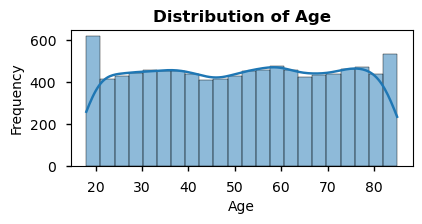

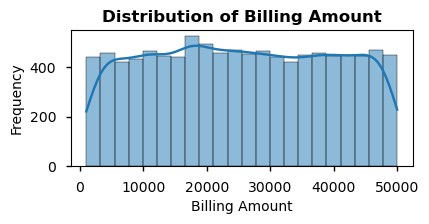

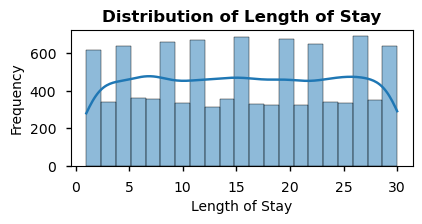

In [11]:
#frequency and distribution visualizations
for col in df_clean.columns:
    if pd.api.types.is_numeric_dtype(df_clean[col].dtype) or df_clean[col].dtype == 'timedelta64':
        plt.figure(figsize = (15,6))
        plt.style.use('seaborn-v0_8-notebook')
        plt.subplot(3,3,3)
        sns.histplot(df_clean[col],kde = True)
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel(col,fontsize = 10)
        plt.title(f'Distribution of {col}',fontsize = 12,weight = 'bold')
        plt.show()

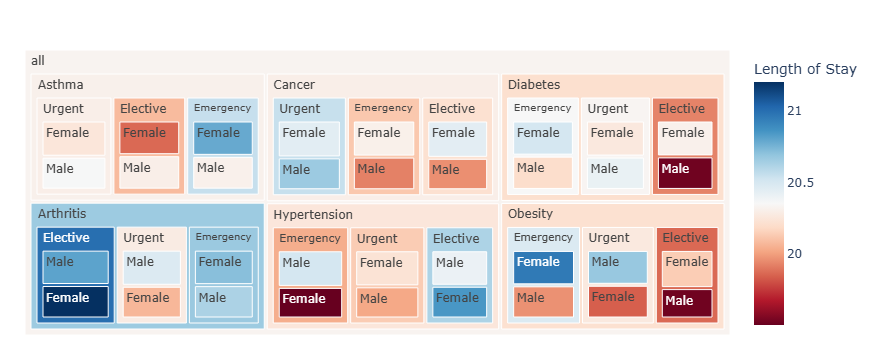

In [12]:
#Create tree map to show relationship between Medical Condition, Admission Type, Gender by Length of Stay
import plotly.express as px
fig = px.treemap(df_clean, path=[px.Constant("all"), 'Medical Condition', 'Admission Type', 'Gender'], values='Length of Stay',
                  color='Length of Stay',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [13]:
'''
From the treemap, it can be seen women have the shortes lengths of stay across most categories. Patients that come in with arthritis stay the longest 
amongst men and women. Elective stays for Diabetes and Obesity are the shortest stays for men at 19.5 days. 

''' 

'\nFrom the treemap, it can be seen women have the shortes lengths of stay across most categories. Patients that come in with arthritis stay the longest \namongst men and women. Elective stays for Diabetes and Obesity are the shortest stays for men at 19.5 days. \n\n'

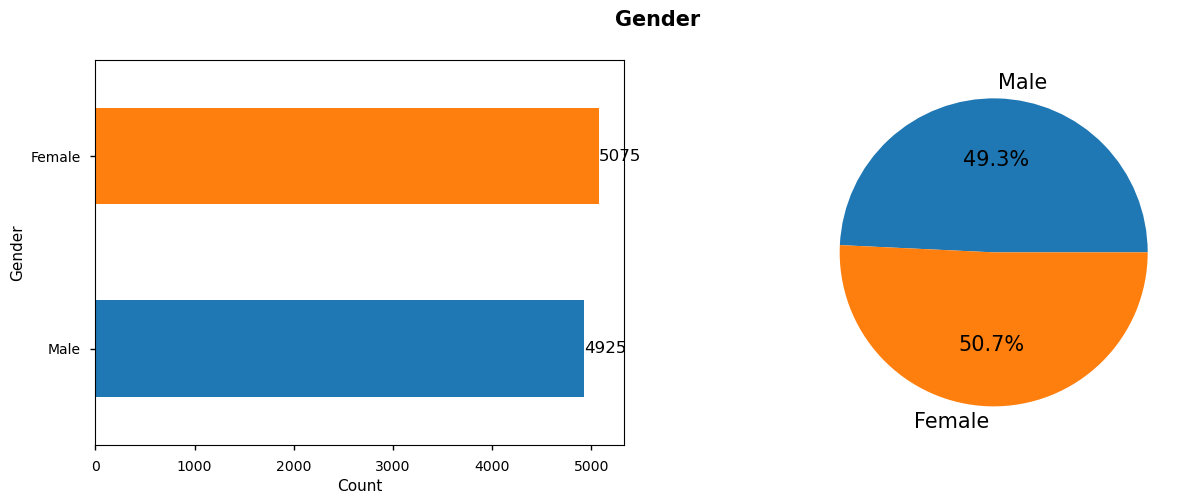

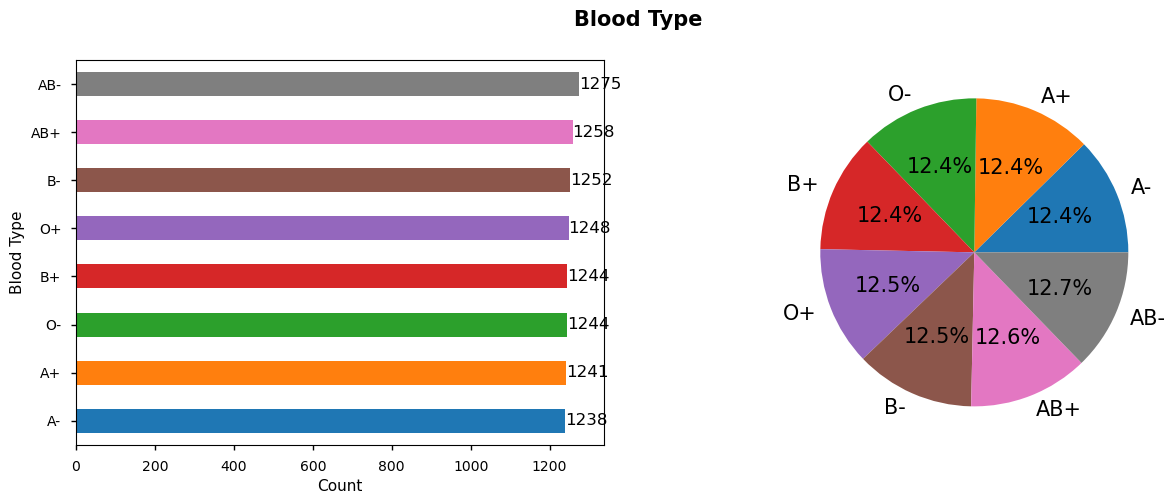

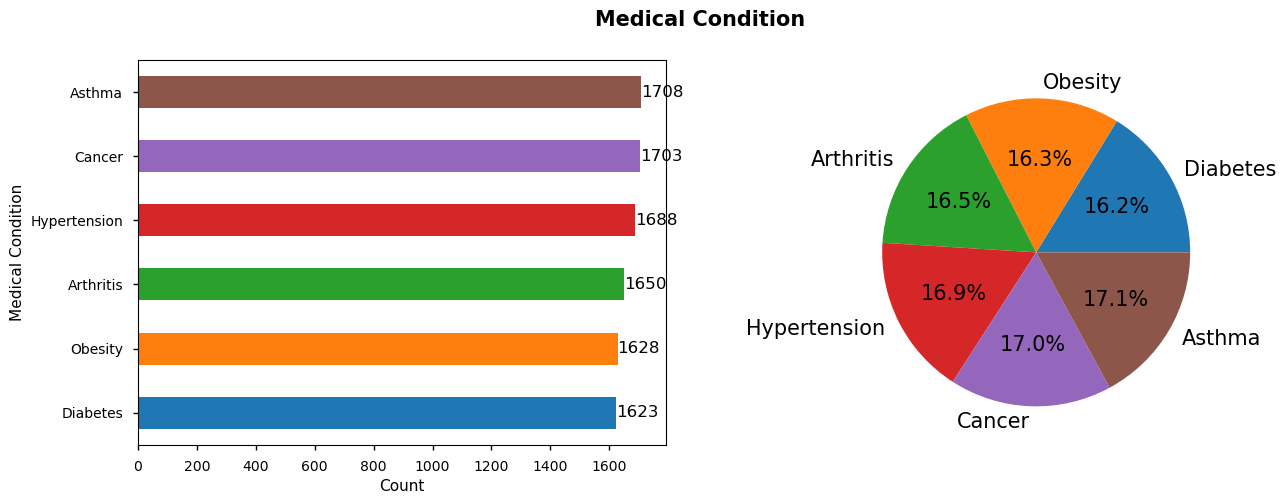

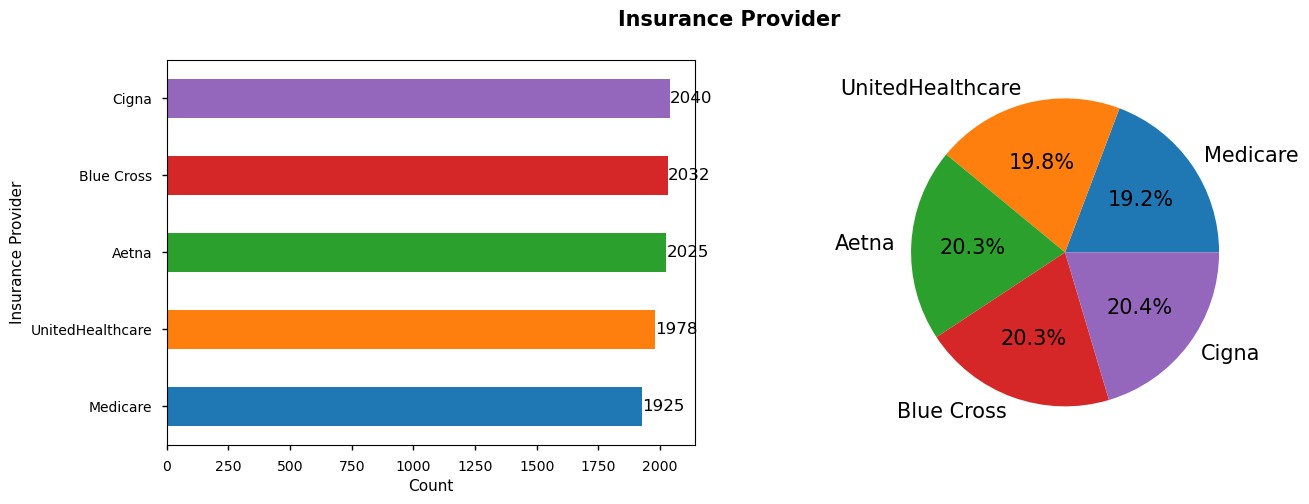

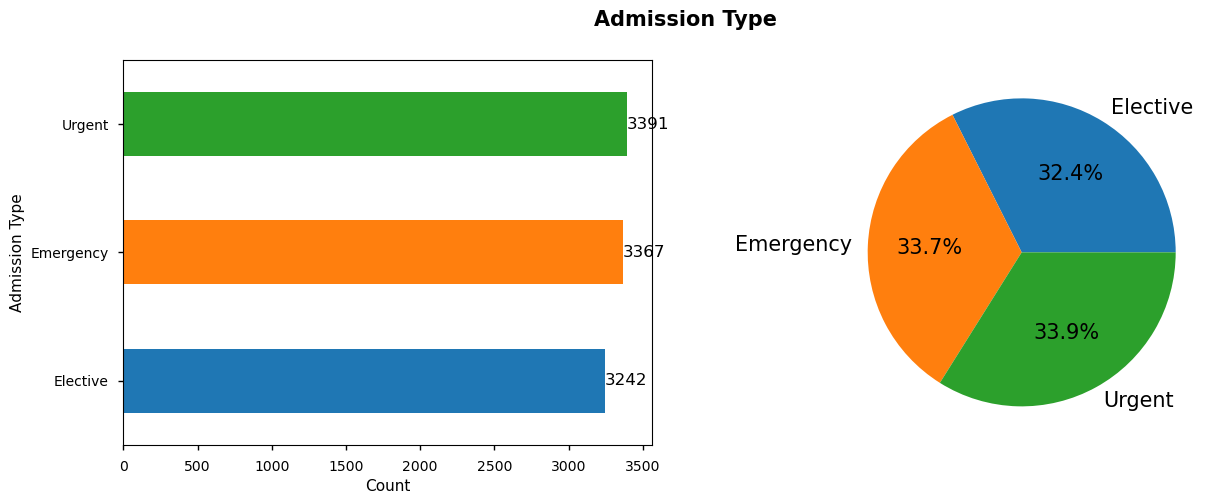

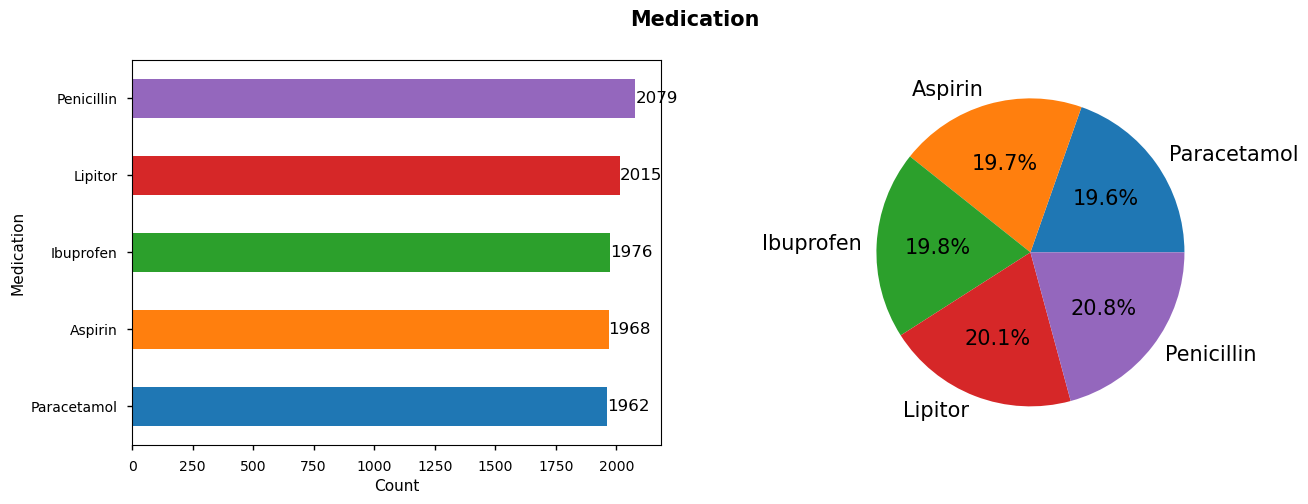

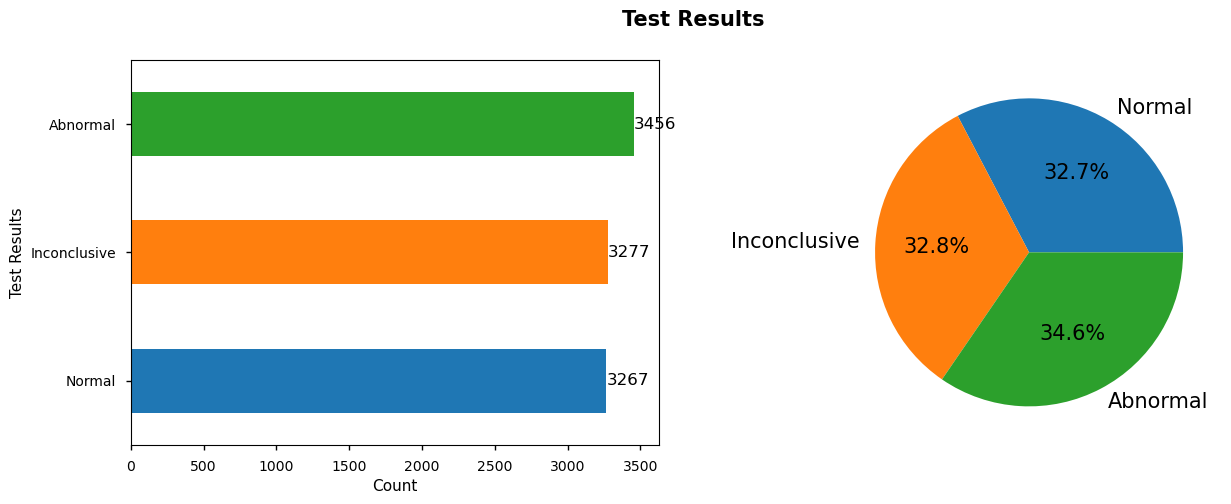

In [13]:
#charts for distribution of categorical variables 
for col in df_clean.columns:
    if df_clean[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print('\n')
        fig,ax = plt.subplots(1,2,figsize = (15,5))
        fig.suptitle(col,fontsize = 15,weight = 'bold')
        plt.subplot(1,2,1)
        category_count = df_clean[col].value_counts().sort_values()
        category_count.plot(kind = 'barh',color= plt.cm.tab10.colors)
        for index,value in enumerate(category_count):
            plt.text(value,index,str(value),fontsize = 12,va = 'center')
        plt.xlabel('Count')
        plt.subplot(1,2,2)
        category_count.plot(kind = 'pie',
               labels = category_count.index,
               autopct = '%1.1f%%',
               textprops = {'fontsize':15})
        plt.ylabel('')
        plt.show()

In [14]:
#group medical condition by admission type 
admin_reason = df_clean.groupby(['Medical Condition', 'Admission Type']).size().sort_values().unstack()
admin_reason


Admission Type     Elective  Emergency  Urgent
Medical Condition                             
Arthritis               569        529     552
Asthma                  570        556     582
Cancer                  555        578     570
Diabetes                528        557     538
Hypertension            515        578     595
Obesity                 505        569     554

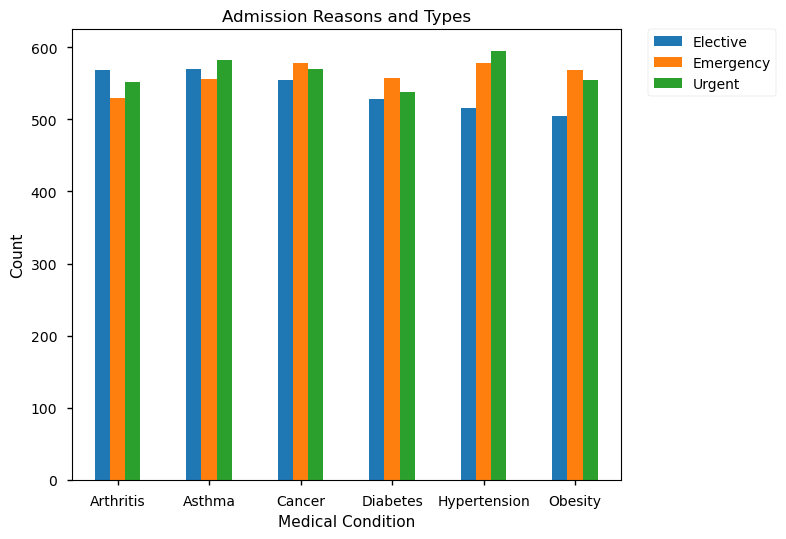

In [15]:
ax = admin_reason.plot(kind='bar', title ='Admission Reasons and Types')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.tight_layout() 
plt.show()

In [16]:
#create copy of df_clean called df_en for encoded categorical vars
df_en = df_clean.copy()

#encode categorical variables
df_en['Gender'] = df_clean['Gender'].astype('category').cat.codes
df_en['Admission Type'] = df_clean['Admission Type'].astype('category').cat.codes
df_en['Test Results'] = df_clean['Test Results'].astype('category').cat.codes
df_en['Doctor'] = df_clean['Doctor'].astype('category').cat.codes
df_en['Hospital'] = df_clean['Hospital'].astype('category').cat.codes
df_en['Insurance Provider'] = df_clean['Insurance Provider'].astype('category').cat.codes
df_en['Medication'] = df_clean['Medication'].astype('category').cat.codes
df_en['Blood Type'] = df_clean['Blood Type'].astype('category').cat.codes
df_en['Medical Condition'] = df_clean['Medical Condition'].astype('category').cat.codes


In [17]:
correlation_matrix = df_en.corr()
correlation_matrix

Age    Gender  Blood Type  Medical Condition  \
Age                 1.000000 -0.008099   -0.006807          -0.003616   
Gender             -0.008099  1.000000    0.012607          -0.003872   
Blood Type         -0.006807  0.012607    1.000000          -0.005318   
Medical Condition  -0.003616 -0.003872   -0.005318           1.000000   
Date of Admission  -0.015810  0.015215   -0.001138           0.003664   
Doctor              0.016265  0.017136    0.005417           0.011276   
Hospital           -0.007291 -0.000941    0.012167           0.004974   
Insurance Provider -0.000138 -0.020669    0.025533           0.007111   
Billing Amount     -0.009483  0.002340   -0.002524           0.008602   
Admission Type      0.003233 -0.004515   -0.005247           0.019222   
Discharge Date     -0.015657  0.015107   -0.001040           0.003395   
Medication          0.010242  0.007129   -0.002690          -0.003538   
Test Results        0.008747 -0.010472   -0.003698           0.001659   
Length of Stay      0.009111 -0.006361    0.005942          -0.016266   

                    Date of Admission    Doctor  Hospital  Insurance Provider  \
Age                         -0.015810  0.016265 -0.007291           -0.000138   
Gender                       0.015215  0.017136 -0.000941           -0.020669   
Blood Type                  -0.001138  0.005417  0.012167            0.025533   
Medical Condition            0.003664  0.011276  0.004974            0.007111   
Date of Admission            1.000000 -0.008104  0.016997            0.003815   
Doctor                      -0.008104  1.000000  0.022142           -0.022885   
Hospital                     0.016997  0.022142  1.000000            0.015020   
Insurance Provider           0.003815 -0.022885  0.015020            1.000000   
Billing Amount               0.003270 -0.013330  0.002607           -0.015143   
Admission Type               0.006344  0.005842 -0.021674            0.012776   
Discharge Date               0.999864 -0.008442  0.017034            0.003721   
Medication                   0.006764 -0.001012  0.006021            0.007692   
Test Results                -0.002918  0.003527 -0.000391           -0.010429   
Length of Stay               0.001771 -0.020551  0.002414           -0.005630   

                    Billing Amount  Admission Type  Discharge Date  \
Age                      -0.009483        0.003233       -0.015657   
Gender                    0.002340       -0.004515        0.015107   
Blood Type               -0.002524       -0.005247       -0.001040   
Medical Condition         0.008602        0.019222        0.003395   
Date of Admission         0.003270        0.006344        0.999864   
Doctor                   -0.013330        0.005842       -0.008442   
Hospital                  0.002607       -0.021674        0.017034   
Insurance Provider       -0.015143        0.012776        0.003721   
Billing Amount            1.000000        0.002531        0.003047   
Admission Type            0.002531        1.000000        0.006245   
Discharge Date            0.003047        0.006245        1.000000   
Medication               -0.017349       -0.007887        0.006911   
Test Results             -0.005844       -0.010964       -0.003053   
Length of Stay           -0.013507       -0.005942        0.018269   

                    Medication  Test Results  Length of Stay  
Age                   0.010242      0.008747        0.009111  
Gender                0.007129     -0.010472       -0.006361  
Blood Type           -0.002690     -0.003698        0.005942  
Medical Condition    -0.003538      0.001659       -0.016266  
Date of Admission     0.006764     -0.002918        0.001771  
Doctor               -0.001012      0.003527       -0.020551  
Hospital              0.006021     -0.000391        0.002414  
Insurance Provider    0.007692     -0.010429       -0.005630  
Billing Amount       -0.017349     -0.005844       -0.013507  
Admission Type       -0.007887  

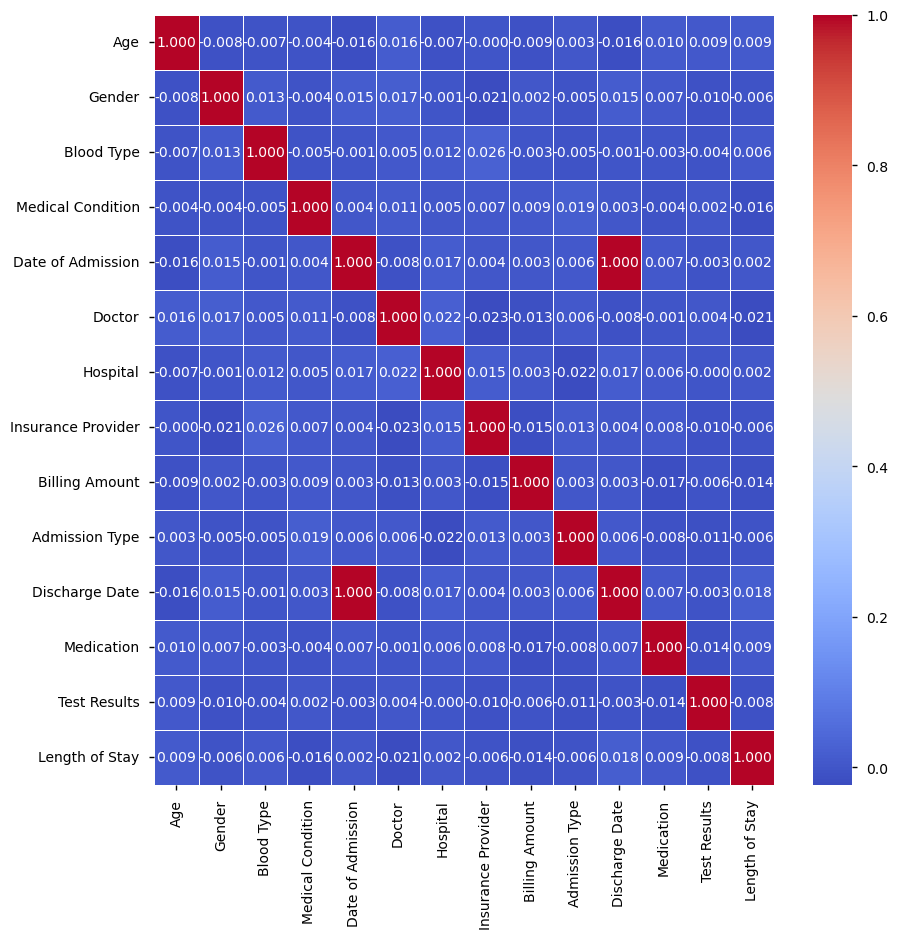

In [18]:
#plotting correlation matrix using heatmap
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.3f',linewidths = 0.5)
plt.show()

In [ ]:
'''
Correlation heatmap shows that there is very little correlation between variables. 
There is a lot of varibales with negative correlation or very weak positive correlation. The strongest positve correlations
are between medication and all other variables except Test Results where the correlation is negative.

'''


In [19]:
#Average billing amount by Admission Type
admin_billing = df_clean.groupby(['Admission Type'])['Billing Amount'].mean().sort_values(ascending = False).reset_index()
admin_billing

Admission Type  Billing Amount
0         Urgent    25960.833557
1       Elective    25891.832668
2      Emergency    24708.511933

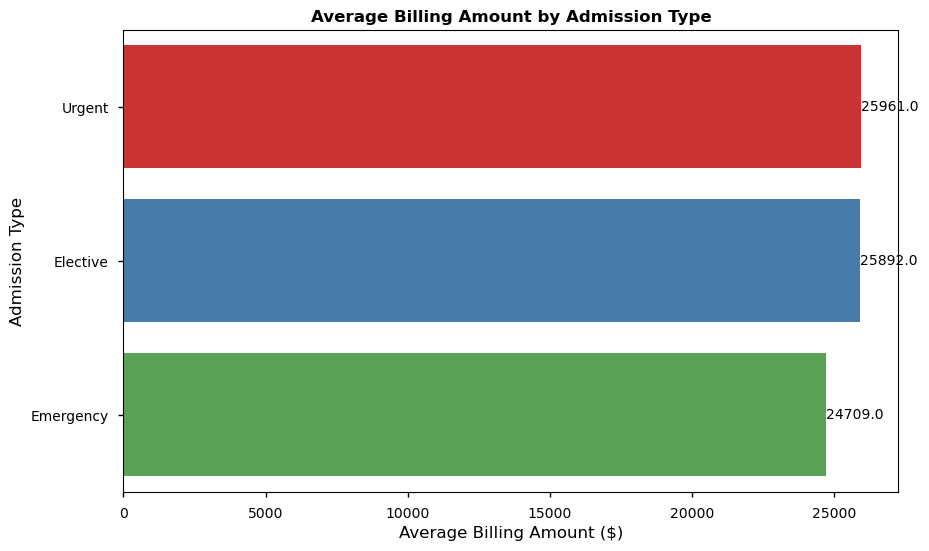

In [20]:
# plot bar graph to find the Average billing amount by Admission Type
plt.figure(figsize=(10,6))
sns.barplot(x= admin_billing['Billing Amount'],
            y= admin_billing['Admission Type'],
            palette="Set1")
for index,value in enumerate(admin_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Average Billing Amount ($)',fontsize = 12)
plt.ylabel('Admission Type',fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Average Billing Amount by Admission Type',fontsize = 12, weight = 'bold')
plt.show()

In [21]:
#Top 15 highest billing doctors
doctors_billing = df_clean.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:15].reset_index()
doctors_billing

Doctor  Billing Amount
0     Michael Johnson   181576.474893
1   Christopher Davis   159763.924755
2      Jennifer Smith   149972.685230
3        Robert Brown   147747.938399
4        Angela Jones   141867.200639
5       Robert Miller   129493.950567
6          John Jones   127864.878980
7        Leslie Jones   123228.453342
8     Jessica Johnson   122383.408771
9        Daniel Smith   121830.506139
10       Joseph Smith   118915.905553
11    Heather Johnson   115707.262494
12      David Johnson   114247.020721
13   Matthew Williams   113630.017307
14     Brian Williams   112313.289949

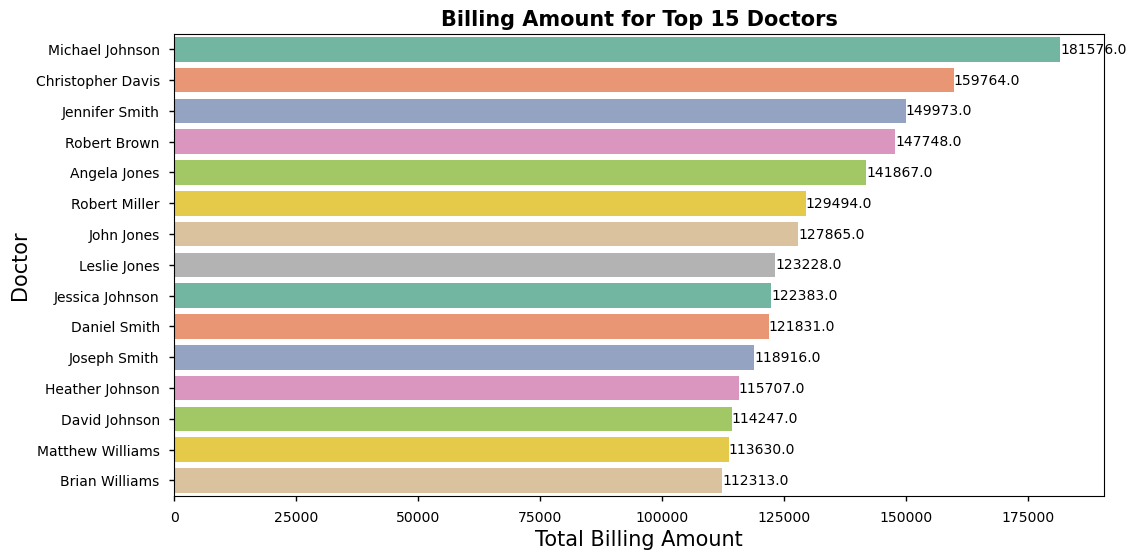

In [22]:
# plot bar graph to find the top 15 doctors by billing
plt.figure(figsize=(12,6))
sns.barplot(x= doctors_billing['Billing Amount'],
            y= doctors_billing['Doctor'],
            palette="Set2")
for index,value in enumerate(doctors_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 15 Doctors',fontsize = 15, weight = 'bold')
plt.show()

In [23]:
#Top 15 lowest billing doctors
doctors_billing_low = df_clean.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[-15:].reset_index()
doctors_billing_low

Doctor  Billing Amount
0   Mr. Jeffrey Washington DVM     1084.422303
1                Rebecca Solis     1082.444714
2               Michael Berger     1080.866953
3                  Victor Dean     1071.456127
4                  Samuel Shaw     1070.015270
5                   Thomas Lee     1068.419659
6             Carrie Owens DVM     1046.985159
7                 Nathan Mejia     1042.981212
8                 Leslie Lewis     1036.079068
9               Samantha Jones     1032.640280
10               Kevin Higgins     1032.263087
11              Andrea Cordova     1020.337790
12         Christopher Jenkins     1009.417327
13            Christopher Ruiz     1004.416897
14               Samuel Taylor     1000.180837

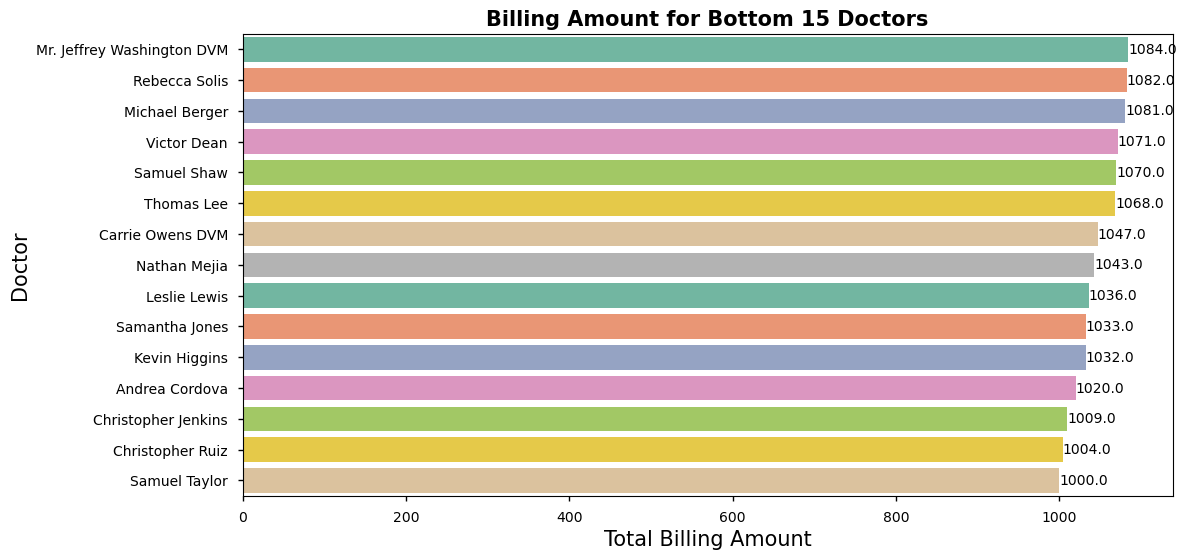

In [24]:
# plot bar graph to find the bottom 15 doctors by billing
plt.figure(figsize=(12,6))
sns.barplot(x= doctors_billing_low['Billing Amount'],
            y= doctors_billing_low['Doctor'],
            palette="Set2")
for index,value in enumerate(doctors_billing_low['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Bottom 15 Doctors',fontsize = 15, weight = 'bold')
plt.show()

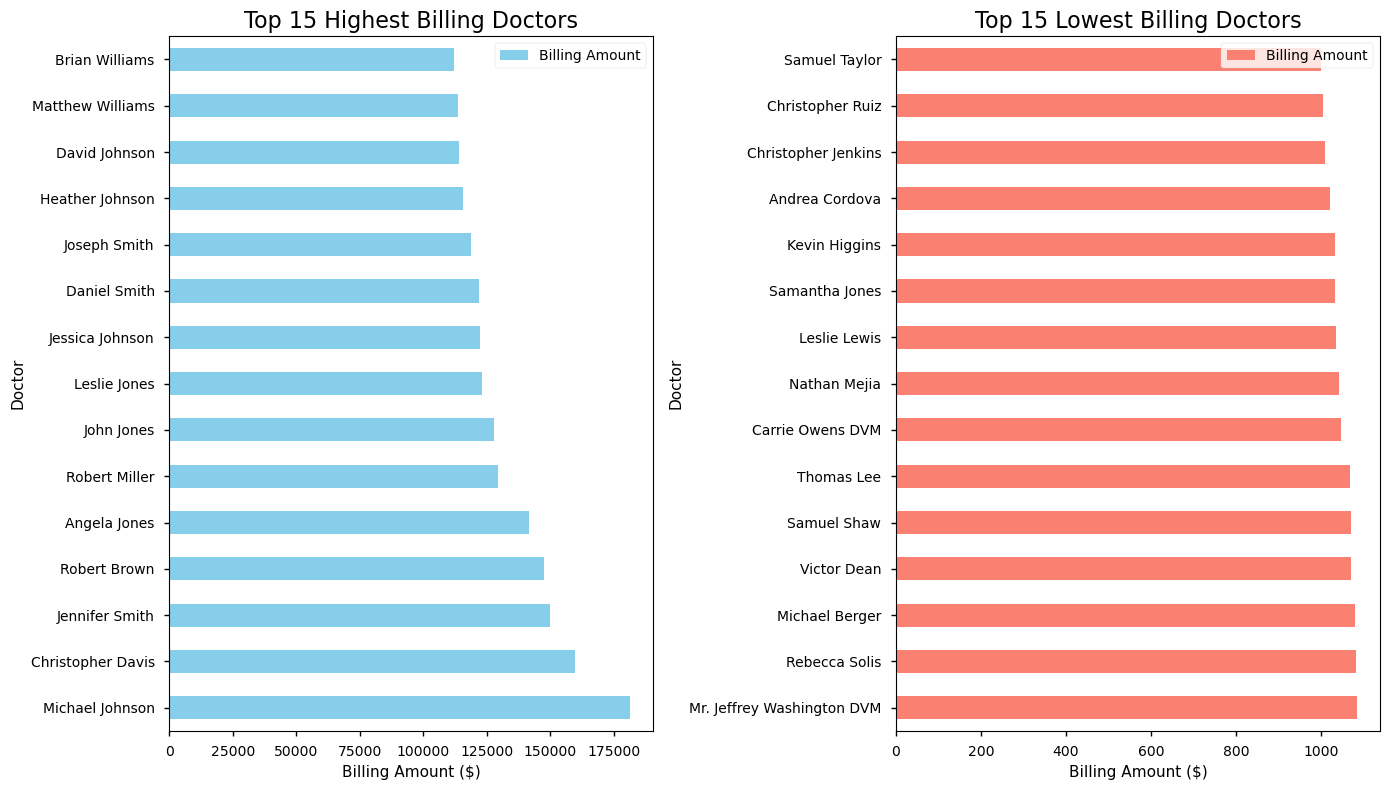

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8), sharex=False)

# Top 15 Plot 
doctors_billing.sort_values(by='Billing Amount', ascending=False).plot(
    kind='barh', x='Doctor', y='Billing Amount', ax=axes[0], color='skyblue'
)
axes[0].set_title('Top 15 Highest Billing Doctors', fontsize=16)
axes[0].set_ylabel('Doctor')
axes[0].set_xlabel('Billing Amount ($)')

# Bottom 15 Plot
doctors_billing_low.plot(
    kind='barh', x='Doctor', y='Billing Amount', ax=axes[1], color='salmon'
)
axes[1].set_title('Top 15 Lowest Billing Doctors', fontsize=16)
axes[1].set_ylabel('Doctor')
axes[1].set_xlabel('Billing Amount ($)')

plt.tight_layout()
plt.show()

In [26]:
# Grouping data by medical condition,gender,and admission type
med_gen_adm = df_clean.groupby(['Medical Condition','Gender','Admission Type'])[['Billing Amount']].mean().reset_index()
med_gen_adm

Medical Condition  Gender Admission Type  Billing Amount
0          Arthritis  Female       Elective    26104.828831
1          Arthritis  Female      Emergency    23017.682350
2          Arthritis  Female         Urgent    24984.743162
3          Arthritis    Male       Elective    26146.583147
4          Arthritis    Male      Emergency    25880.104797
5          Arthritis    Male         Urgent    24989.718132
6             Asthma  Female       Elective    26348.778341
7             Asthma  Female      Emergency    24939.480442
8             Asthma  Female         Urgent    25706.144596
9             Asthma    Male       Elective    24417.532692
10            Asthma    Male      Emergency    24449.006971
11            Asthma    Male         Urgent    26556.999092
12            Cancer  Female       Elective    25371.468857
13            Cancer  Female      Emergency    25170.034504
14            Cancer  Female         Urgent    25567.230831
15            Cancer    Male       Elective    25795.021170
16            Cancer    Male      Emergency    24839.826634
17            Cancer    Male         Urgent    26573.843754
18          Diabetes  Female       Elective    26758.643545
19          Diabetes  Female      Emergency    26109.551789
20          Diabetes  Female         Urgent    26258.490142
21          Diabetes    Male       Elective    26408.369887
22          Diabetes    Male      Emergency    23670.196754
23          Diabetes    Male         Urgent    27292.711232
24      Hypertension  Female       Elective    26047.986077
25      Hypertension  Female      Emergency    23758.174052
26      Hypertension  Female         Urgent    25652.595233
27      Hypertension    Male       Elective    25693.661921
28      Hypertension    Male      Emergency    24223.706261
29      Hypertension    Male         Urgent    25944.152845
30           Obesity  Female       Elective    26400.264064
31           Obesity  Female      Emergency    25150.624951
32           Obesity  Female         Urgent    25465.461781
33           Obesity    Male       Elective    25164.997662
34           Obesity    Male      Emergency    25366.449955
35           Obesity    Male         Urgent    26714.053506

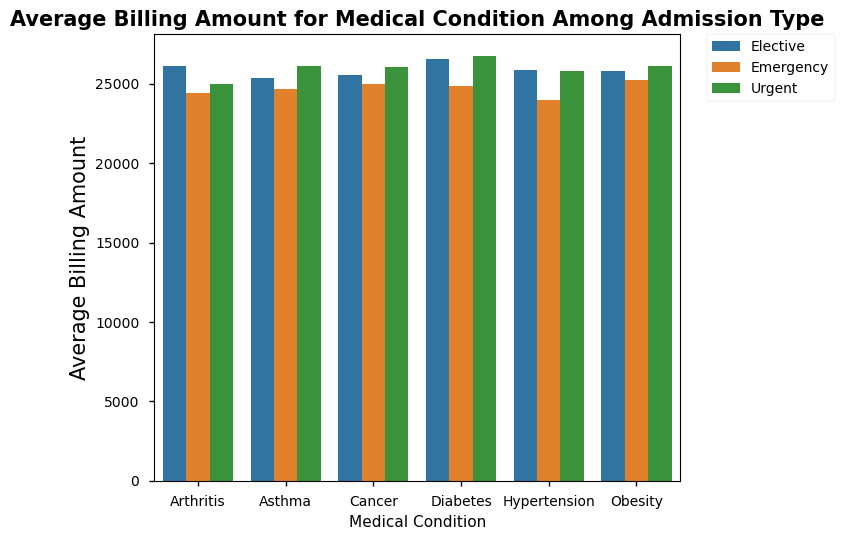

In [27]:
sns.barplot(x= med_gen_adm['Medical Condition'],
            y= med_gen_adm['Billing Amount'],
            hue = med_gen_adm['Admission Type'],ci = None)
# Adding labels and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Average Billing Amount',fontsize = 15)
plt.title('Average Billing Amount for Medical Condition Among Admission Type',fontsize = 15, weight = 'bold')
plt.tight_layout()
plt.show()

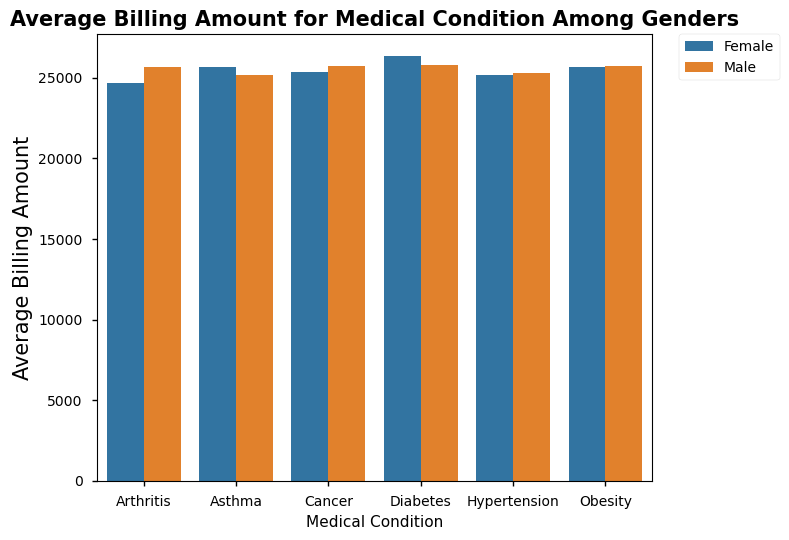

In [28]:
sns.barplot(x= med_gen_adm['Medical Condition'],
            y= med_gen_adm['Billing Amount'],
            hue = med_gen_adm['Gender'],ci = None)
# Adding labels and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.ylabel('Average Billing Amount',fontsize = 15)
plt.title('Average Billing Amount for Medical Condition Among Genders',fontsize = 15, weight = 'bold')
plt.tight_layout()
plt.show()

In [ ]:
'''
From this graph, we can see that Medical Condition and Billing Amount aren't significantly effected by gender. 
Males and Females are spilt fairly equally. Male billing is sligtly higher in arthritis, cancer, hypertension, 
and obesity.
'''

In [29]:
#Top 15 highest billing hospitals
hospital_billing = df_clean.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:15].reset_index()
hospital_billing

Hospital  Billing Amount
0   Smith and Sons   477638.881124
1        Smith PLC   432283.548554
2        Smith Ltd   428163.073062
3        Smith Inc   351463.888372
4     Williams LLC   327522.472644
5     Thomas Group   327045.374505
6      Johnson Ltd   305971.192470
7   Davis and Sons   293452.520353
8        Jones Inc   290351.193848
9        Brown LLC   284695.674489
10     Johnson PLC   269777.542385
11       Jones LLC   264089.796020
12  Williams Group   258444.925381
13    Williams Ltd   251669.726520
14     Smith Group   247635.075637

In [30]:
#Top 15 highest for Admission Type
hospital_admit = df_clean.groupby(['Hospital'])['Admission Type'].value_counts().sort_values(ascending = False)[:15].reset_index()
hospital_admit

Hospital Admission Type  count
0      Johnson PLC      Emergency      8
1     Williams Inc       Elective      8
2        Smith PLC      Emergency      8
3    Johnson Group       Elective      7
4   Smith and Sons       Elective      6
5        Smith Inc      Emergency      6
6     Williams LLC      Emergency      6
7        Smith PLC         Urgent      6
8        Smith Ltd      Emergency      6
9   Smith and Sons         Urgent      6
10       Jones Inc       Elective      5
11       Smith Inc         Urgent      5
12    Thomas Group       Elective      5
13    Thomas Group      Emergency      5
14  Jones and Sons       Elective      5

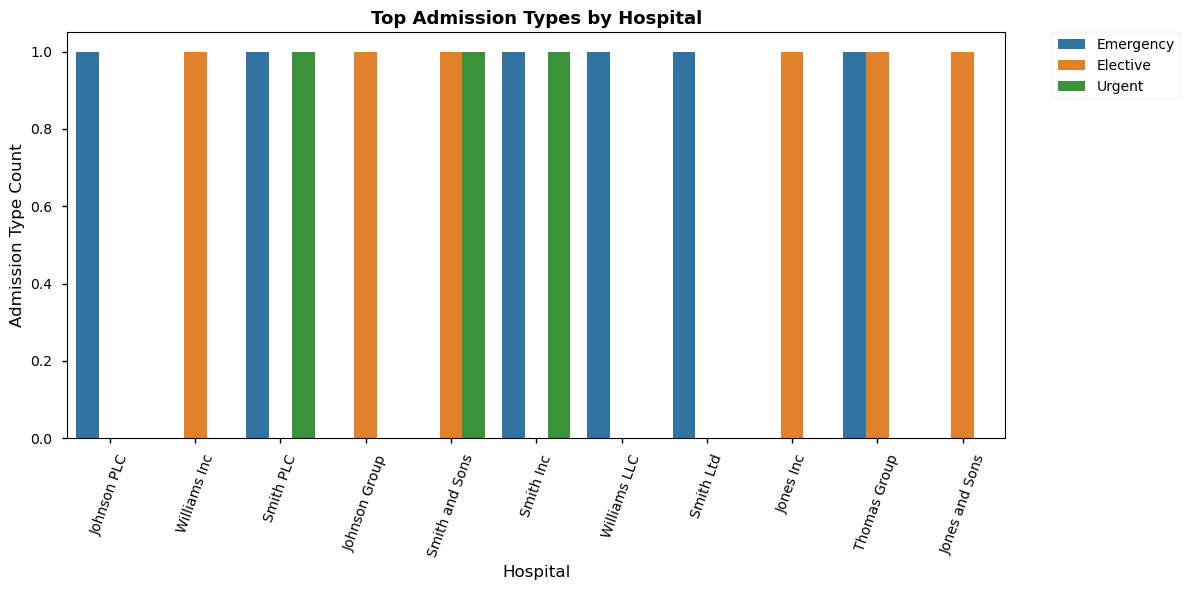

In [31]:
# plot bar graph of hospitals
plt.figure(figsize=(12,6))
sns.countplot(data= hospital_admit,
              x='Hospital',
              hue='Admission Type')

# Adding labels and title
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Hospital',fontsize = 12)
plt.ylabel('Admission Type Count',fontsize = 12)
plt.xticks(fontsize = 10)
plt.xticks(rotation = 70)
plt.yticks(fontsize = 10)
plt.title('Top Admission Types by Hospital',fontsize = 13, weight = 'bold')
plt.tight_layout()
plt.show()

In [ ]:
'''
From this graph it can be seen that no hosptial does each type of admission. Only 3 hospitals have do Urgent admissions.
Most do Emergency or Elective Admissions. 

'''

R2 Score of the model: -0.032


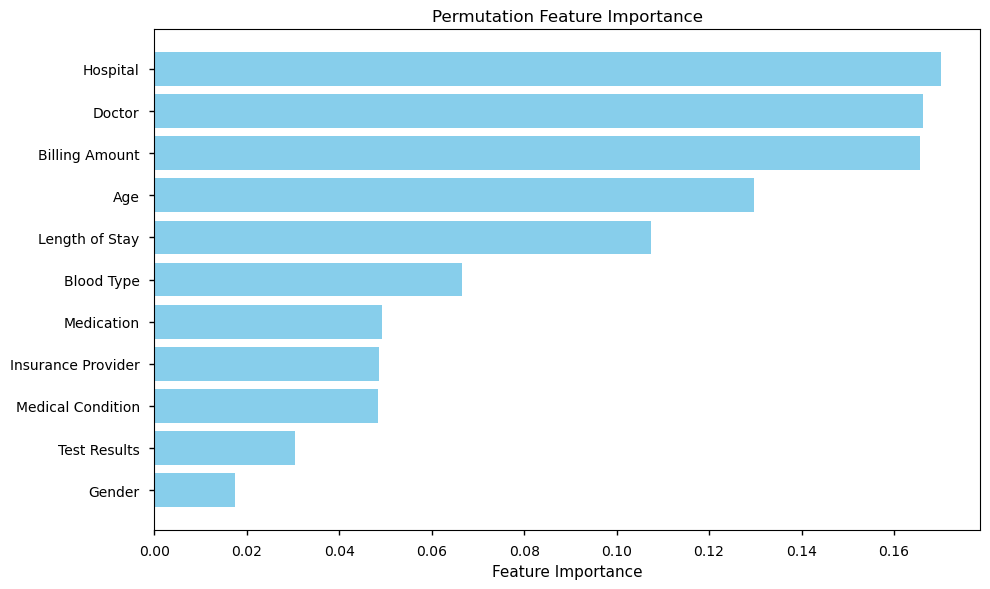

In [33]:
#Predictive analytics 
target_col = 'Admission Type'

# Filter features that are numeric
features = [col for col in df_en.columns if col not in target_col and pd.api.types.is_numeric_dtype(df_en[col])]

#set X and y
X = df_en[features]
y = df_en.loc[X.index, target_col]

#split dataset into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train random forrest model 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set and calculate the R-squared score
y_pred = rf.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R2 Score of the model: {score:.3f}")

# Permutation importance using feature importances from the Random Forest
important_features = rf.feature_importances_
indices = np.argsort(important_features)

plt.figure(figsize=(10, 6))
plt.barh(range(len(important_features)), important_features[indices], color='skyblue')
plt.yticks(range(len(important_features)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

In [34]:
#Redo model with most important  features

#Predictive analytics 
target_col = 'Admission Type'

# Filter features that are numeric
features = ['Hospital','Doctor', 'Billing Amount', 'Age', 'Length of Stay', 'Blood Type']

#set X and y
X = df_en[features]
y = df_en.loc[X.index, target_col]

#split dataset into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train random forrest model 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set and calculate the R-squared score
y_pred = rf.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R2 Score of the model: {score:.3f}")


R2 Score of the model: -0.051


In [36]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#create target variable
target_col = 'Admission Type'

#create features
features_log = [col for col in df_en.columns if col not in target_col and pd.api.types.is_numeric_dtype(df_en[col])]

#set X and y
X = df_en[features]
y = df_en.loc[X.index, target_col]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Instantiate and fit the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 35.30%
Confusion Matrix:
 [[ 52 378 585]
 [ 52 415 524]
 [ 51 351 592]]

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.05      0.09      1015
           1       0.36      0.42      0.39       991
           2       0.35      0.60      0.44       994

    accuracy                           0.35      3000
   macro avg       0.35      0.36      0.31      3000
weighted avg       0.35      0.35      0.30      3000



In [37]:
#lasso regression 
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

#define predictor and response variables
target_col = 'Admission Type'
features_log = [col for col in df_en.columns if col not in target_col and pd.api.types.is_numeric_dtype(df_en[col])]

#set X and y
X = df_en[features]
y = df_en.loc[X.index, target_col]

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#define model
lasso_model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
lasso_model.fit(X, y)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

#Evaluate model
accuracy_lasso = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_lasso * 100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 35.30%
Confusion Matrix:
 [[ 52 378 585]
 [ 52 415 524]
 [ 51 351 592]]

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.05      0.09      1015
           1       0.36      0.42      0.39       991
           2       0.35      0.60      0.44       994

    accuracy                           0.35      3000
   macro avg       0.35      0.36      0.31      3000
weighted avg       0.35      0.35      0.30      3000



In [ ]:
'''
With low model accuracy across multiple models a few conculusions can be made.
1. Poor data quality -- it's a relatively small dataset at 10000 datapoints. The data in the dataset might not be the useful 
in predicting Admission Type. Adding more data might help.
2. Incorrect model choice -- the models chosen don't fit the target variable. Changing the target variable and the model 
might increase accuracy
'''


In [38]:
#change target variable
#Predictive analytics 
target_col = 'Test Results'

# Filter features that are numeric
features = [col for col in df_en.columns if col not in target_col and pd.api.types.is_numeric_dtype(df_en[col])]

#set X and y
X = df_en[features]
y = df_en.loc[X.index, target_col]

#split dataset into test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train random forrest model 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set and calculate the R-squared score
y_pred = rf.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R2 Score of the model: {score:.3f}")

R2 Score of the model: -0.013
